CATS VS DOGS


In [1]:
total_data = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages"

In [2]:
import os
# Obtener una lista de todos los nombres de archivos de imágenes de gatos
cats_subfolder = os.path.join(total_data, "cat")
cats_image_files = os.listdir(cats_subfolder)

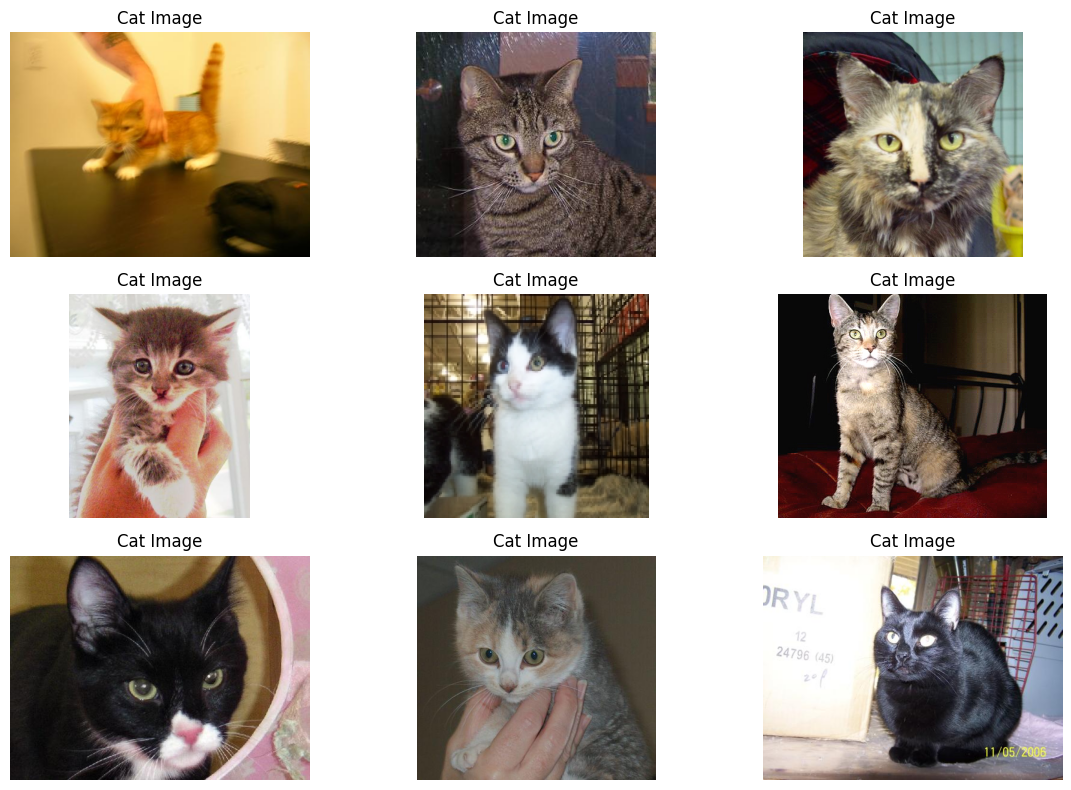

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

# Cargar las primeras nueve imágenes de gatos
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)
    
# Crear una única figura para mostrar todas las imágenes de gatos
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

Vuelvo a cargar la ruta para cargar las primeras 9 imagenes de perros

In [4]:
total_data = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages"

In [5]:
import os
# Obtener una lista de todos los nombres de archivos de imágenes de perros

dog_subfolder = os.path.join(total_data, "dog")
dog_image_files = os.listdir(dog_subfolder)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

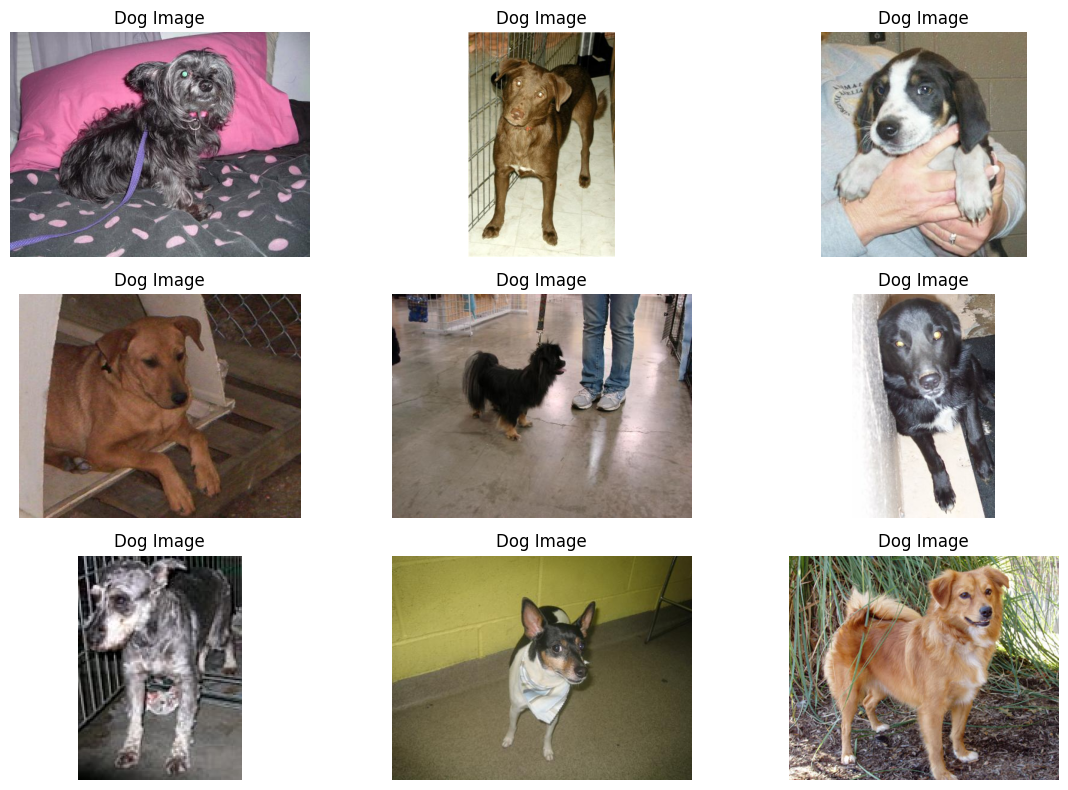

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)
    
    plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [7]:
import os
import shutil

# Ruta a la carpeta "raw"
petimages_dir = "C:/Users/elisa/OneDrive/scritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages"  # Reemplaza con la ruta correcta

# Ruta a la carpeta "petimages"
petimages_dir = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages"  # Reemplaza con la ruta correcta

# Ruta a la carpeta "train" dentro de "raw"
train_dir = os.path.join(petimages_dir, "train")
os.makedirs(train_dir, exist_ok=True)  # Crea la carpeta "train" si no existe

# Rutas a las subcarpetas "cat" y "dog" dentro de "train"
cat_dir = os.path.join(train_dir, "cat")
dog_dir = os.path.join(train_dir, "dog")

# Crea las subcarpetas "cat" y "dog"
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Función para copiar archivos de una carpeta a otra
def copiar_archivos(origen, destino):
    for filename in os.listdir(origen):
        filepath = os.path.join(origen, filename)
        shutil.copy(filepath, os.path.join(destino, filename))

# Copia imágenes de "cat" a la subcarpeta "cat" en "train"
copiar_archivos(os.path.join(petimages_dir, "cat"), cat_dir)

# Copia imágenes de "dog" a la subcarpeta "dog" en "train"
copiar_archivos(os.path.join(petimages_dir, "dog"), dog_dir)

In [8]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

# Ruta al directorio original de entrenamiento
train_dir = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages/train"

# Ruta al directorio donde se encuentran las imágenes de perros y gatos
perros_dir = os.path.join(train_dir, "dog")
gatos_dir = os.path.join(train_dir, "cat")

# Dividir las imágenes en dos conjuntos: entrenamiento y validación
perros_train, perros_test = train_test_split(os.listdir(perros_dir), test_size=0.5, random_state=42)
gatos_train, gatos_test = train_test_split(os.listdir(gatos_dir), test_size=0.5, random_state=42)

# Crear directorios para el conjunto de prueba
test_dir = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages/test"  # Reemplaza con la ruta correcta
os.makedirs(test_dir, exist_ok=True)

# Copiar las imágenes seleccionadas al nuevo directorio de prueba
def copiar_archivos(origen, destino, archivos):
    for filename in archivos:
        filepath = os.path.join(origen, filename)
        shutil.copy(filepath, os.path.join(destino, filename))

copiar_archivos(perros_dir, test_dir, perros_test)
copiar_archivos(gatos_dir, test_dir, gatos_test)



In [13]:
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages/train"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"],  # Aquí debes tener subcarpetas "dog" y "cat" dentro de train_dir
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["test"],  # Asumiendo que "test" es una subcarpeta dentro de train_dir
)

Found 24959 images belonging to 2 classes.
Found 9152 images belonging to 1 classes.


CONSTRUIR UNA ANN

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de aplanamiento
model.add(Flatten())

# Agregar este código para imprimir la forma antes de la capa densa
print("Shape before Dense layer:", model.output_shape)

# Capa densa 1
model.add(Dense(128, activation='relu'))

# Capa densa 1
model.add(Dense(128, activation='relu'))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))

# Resumen del modelo
model.summary()

Shape before Dense layer: (None, 147456)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 147456)            0         
                                                                 
 dense_7 (Den

In [38]:
# Compilar el modelo usando Adam 
import keras
from keras.optimizers import Adam

# Compilar el modelo antes de entrenar
optimizer = Adam(learning_rate=0.0001)  # Ajustar el learning rate según sea necesario
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [51]:
# Entrenamiento del modelo
model.fit(train_data, epochs = 1)

780/780 [==============================] - 339s 435ms/step - loss: 0.6931 - accuracy: 0.5000


In [48]:
# Guardar el modelo para usarlo más tarde

import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to ../models\vgg16_1.h5
100/100 [==============================] - 48s 484ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000
Epoch 2: val_accuracy improved from 0.00000 to 0.00625, saving model to ../models\vgg16_1.h5
100/100 [==============================] - 44s 442ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.0063
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000
Epoch 3: val_accuracy improved from 0.00625 to 0.99375, saving model to ../models\vgg16_1.h5
100/100 [==============================] - 47s 467ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.9937


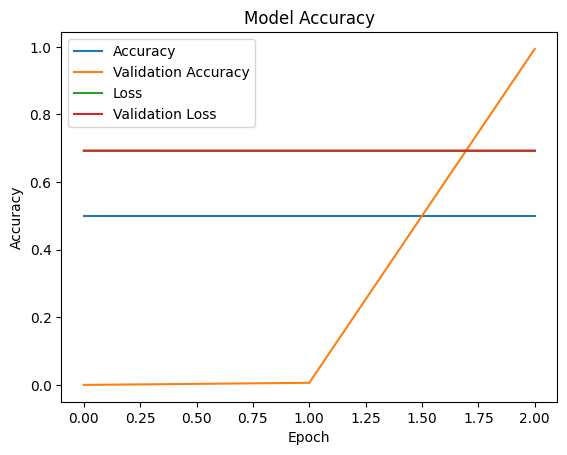

In [53]:
# Verificar la precisión de los datos y graficar los resultados
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

plt.show()

1/1 [==============================] - 0s 63ms/step
cat


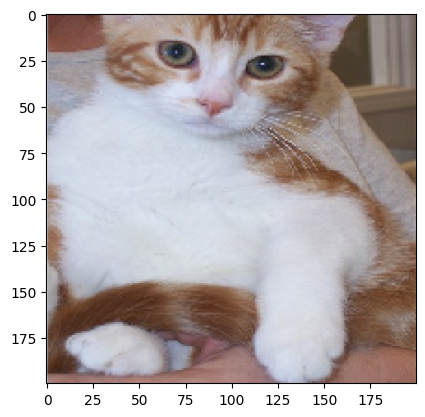

In [54]:
# Porbar el modelo con alguna imagen

from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages/train/test/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > 0.5:
    print("cat")
else:
    print("dog")